In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [3]:
#importing data

df_test = pd.read_csv(r'train.csv')

df_test.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [4]:
print(df_test.shape)

(18524, 9)


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


In [6]:
df_test.describe()

,id,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,18524.000000,17334.000000,17344.000000,17058.000000,17470.000000,17260.000000
mean,9261.500000,3.137764,5.265106,4.044319,7.996737,4.982097
std,5347.562529,3.003786,2.753359,2.062580,4.223484,2.879139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4630.750000,1.000000,3.000000,3.000000,5.000000,3.000000
50%,9261.500000,2.000000,5.000000,4.000000,8.000000,5.000000
75%,13892.250000,4.000000,8.000000,6.000000,12.000000,7.000000
max,18523.000000,11.000000,10.000000,7.000000,15.000000,10.000000


In [7]:
#separate columns by data types

num_cols = df_test.select_dtypes(include = ['int64', 'float64']).columns
cat_cols = df_test.select_dtypes(include = ['object' , 'bool']).columns

print(num_cols)
print(cat_cols)


Index(['id', 'Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
       'Friends_circle_size', 'Post_frequency'],
      dtype='object')
Index(['Stage_fear', 'Drained_after_socializing', 'Personality'], dtype='object')


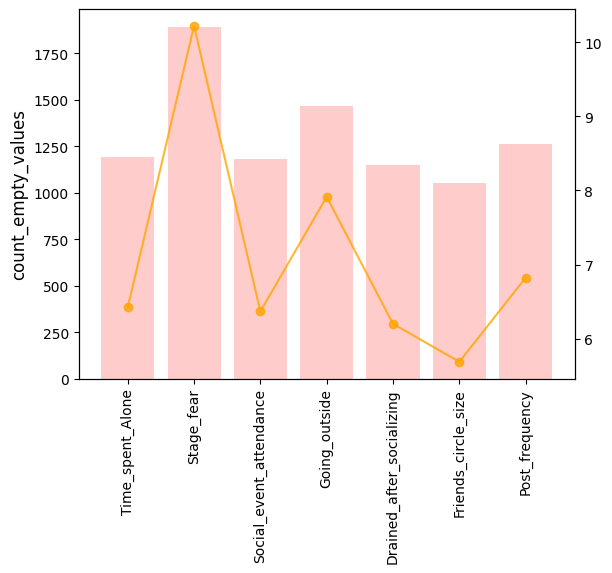

In [72]:
#checking for missing values

empty_values = df_test.isna().sum()
empty_values_ratio = empty_values / len(df_test)*100
empty_df = pd.DataFrame({'Values': empty_values, '_%_': empty_values_ratio})
empty_df = empty_df[empty_df['Values'] > 0]
empty_df


figure, ax1 = plt.subplots()
ax1.bar(empty_df.index, empty_df['Values'], color = 'red', alpha = 0.2,  label = 'empty_values')
ax1.set_ylabel('count_empty_values', fontsize = 12)
plt.xticks(rotation = 90)

ax2 = ax1.twinx()
ax2.plot(empty_df['_%_'], color = 'orange', alpha = 0.8, marker = 'o', label = '%_missing_values')
plt.show()




In [97]:
#inspecting 0 values

for col in num_cols.drop('id'):
    zero_count = (df_test[col] == 0).sum()
    zero_ratio = zero_count / len(df_test) * 100
    print(f'\n{col}:{zero_count}, {zero_ratio:.1f} % of overall')


Time_spent_Alone:3139, 16.9 % of overall

Social_event_attendance:1055, 5.7 % of overall

Going_outside:1324, 7.1 % of overall

Friends_circle_size:467, 2.5 % of overall

Post_frequency:1272, 6.9 % of overall


In [73]:
#detecting outliers

def check_outlier(data,columns):
   for column in columns: 
        q1 = np.quantile(data[column].dropna(), 0.25)
        q3 = np.quantile(data[column].dropna(), 0.75)
        iqr = q3 - q1

        lower_bound = q1 - iqr * 1.5
        upper_bound = q3 + iqr * 1.5

        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        print(f'Outliers in {column}:')

        print(outliers[[column]])
        print('-' * 40)

check_outlier(df_test, num_cols)




Outliers in id:
Empty DataFrame
Columns: [id]
Index: []
----------------------------------------
Outliers in Time_spent_Alone:
       Time_spent_Alone
25                  9.0
27                  9.0
44                  9.0
48                 10.0
55                  9.0
...                 ...
18441              10.0
18448              11.0
18449               9.0
18459              11.0
18501              10.0

[1653 rows x 1 columns]
----------------------------------------
Outliers in Social_event_attendance:
Empty DataFrame
Columns: [Social_event_attendance]
Index: []
----------------------------------------
Outliers in Going_outside:
Empty DataFrame
Columns: [Going_outside]
Index: []
----------------------------------------
Outliers in Friends_circle_size:
Empty DataFrame
Columns: [Friends_circle_size]
Index: []
----------------------------------------
Outliers in Post_frequency:
Empty DataFrame
Columns: [Post_frequency]
Index: []
----------------------------------------


EXPLORATORY DATA ANALYSIS (EDA)

C:\Users\yevhe\AppData\Local\Temp\ipykernel_20892\1877658425.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df_test, x = 'Personality', palette = 'Set2')


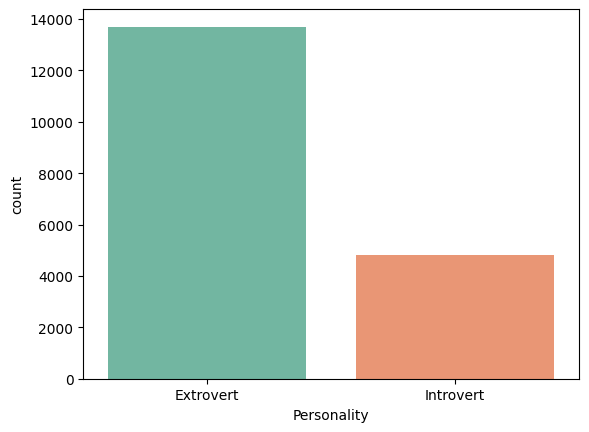

             Values     ratio
Personality                  
Extrovert     13699  73.95271
Introvert      4825  26.04729


In [266]:
# exploring the target distribution

sns.countplot(df_test, x = 'Personality', palette = 'Set2')
plt.show()

personality_values = df_test['Personality'].value_counts()
personality_ratio = personality_values/ len(df_test)*100

personality_df = pd.DataFrame({'Values': personality_values, 'ratio': personality_ratio})

print(f'{personality_df}')



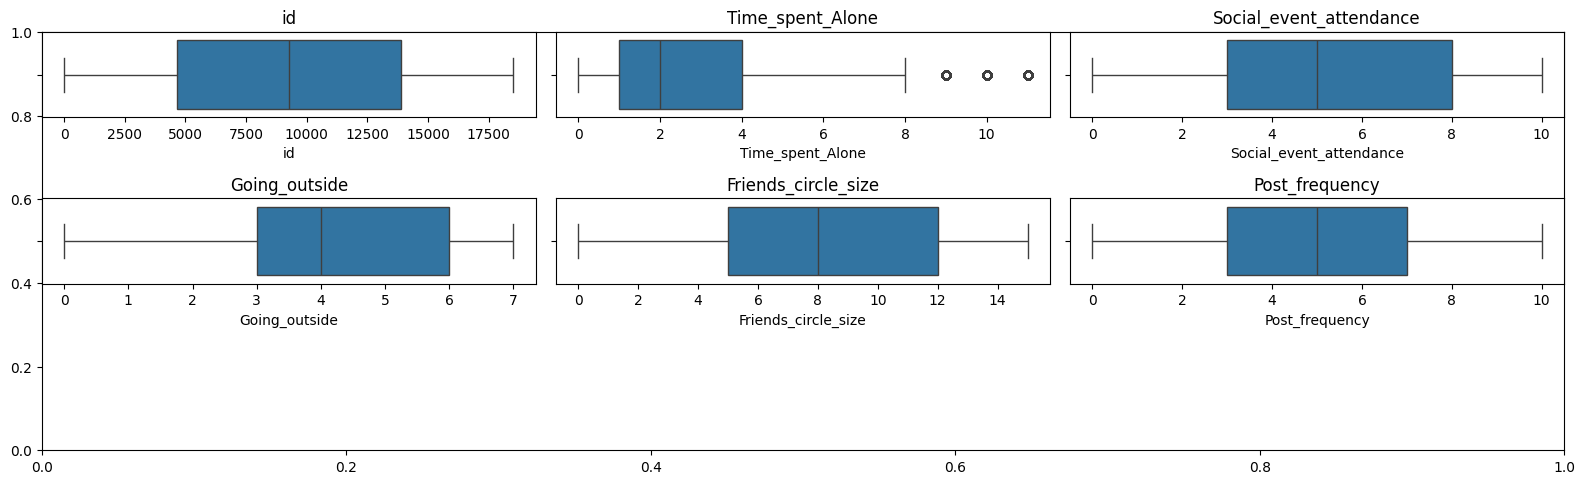

In [150]:
#plotting outliers

plt.subplots(figsize = (16,5))
for i,cols in enumerate(num_cols):
    plt.subplot(3,3,i+1)
    sns.boxplot(df_test, x = cols)
    plt.title(f'{cols}')
plt.tight_layout()
plt.show()
    


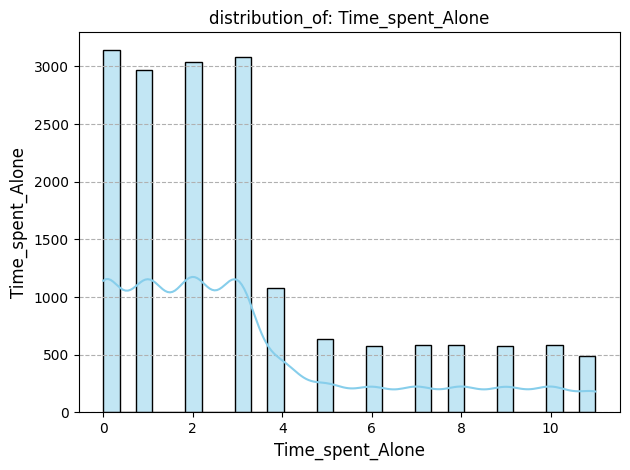

descriptive_stats_of: Time_spent_Alone
count    17334.000000
mean         3.137764
std          3.003786
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         11.000000
Name: Time_spent_Alone, dtype: float64 
 --------------------------------------------------------------------------------


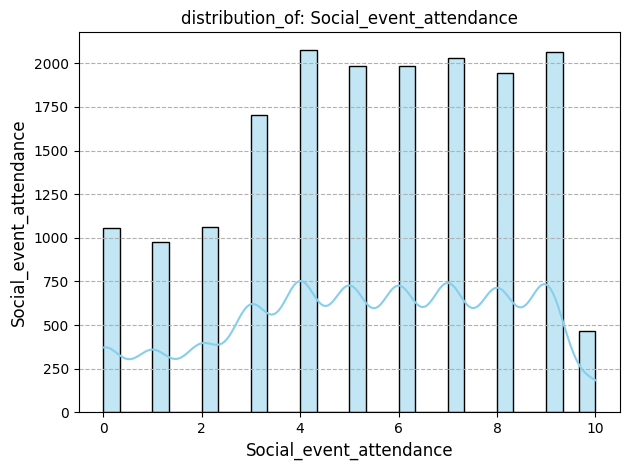

descriptive_stats_of: Social_event_attendance
count    17344.000000
mean         5.265106
std          2.753359
min          0.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         10.000000
Name: Social_event_attendance, dtype: float64 
 --------------------------------------------------------------------------------


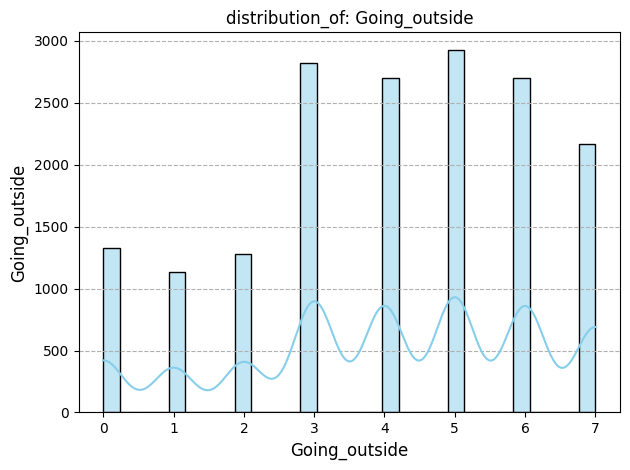

descriptive_stats_of: Going_outside
count    17058.000000
mean         4.044319
std          2.062580
min          0.000000
25%          3.000000
50%          4.000000
75%          6.000000
max          7.000000
Name: Going_outside, dtype: float64 
 --------------------------------------------------------------------------------


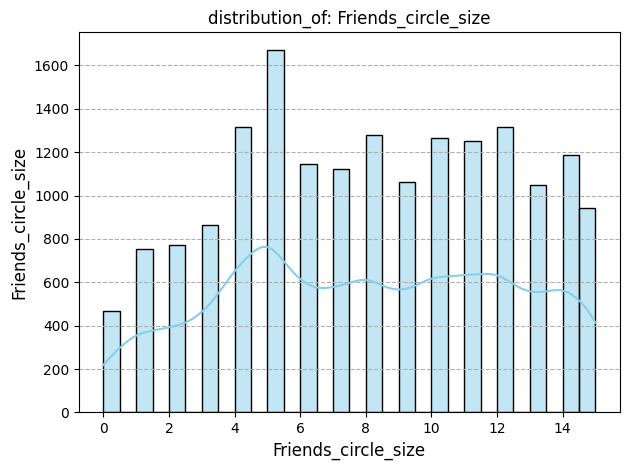

descriptive_stats_of: Friends_circle_size
count    17470.000000
mean         7.996737
std          4.223484
min          0.000000
25%          5.000000
50%          8.000000
75%         12.000000
max         15.000000
Name: Friends_circle_size, dtype: float64 
 --------------------------------------------------------------------------------


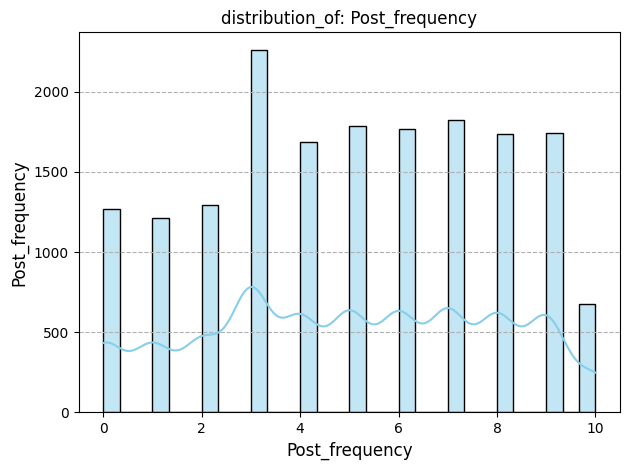

descriptive_stats_of: Post_frequency
count    17260.000000
mean         4.982097
std          2.879139
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Post_frequency, dtype: float64 
 --------------------------------------------------------------------------------


In [248]:
#visualising the spread



for cols in num_cols:
    figure, ax = plt.subplots()
    sns.histplot(df_test, x = cols,color = 'skyblue', kde= True, bins = 30)
    plt.xlabel(cols, fontsize = 12)
    plt.ylabel(cols, fontsize = 12)
    plt.grid(axis = 'y', linestyle = '--')
    ax.set_title(f'distribution_of: {cols}')
    plt.tight_layout()

    plt.show()

    #printing the descriptive stats

    print(f'descriptive_stats_of: {cols}')
    print(df_test[cols].describe(), '\n', '--'*40)

C:\Users\yevhe\AppData\Local\Temp\ipykernel_20892\4209368574.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df_test, x = cols, palette = 'Set2', edgecolor = 'black')


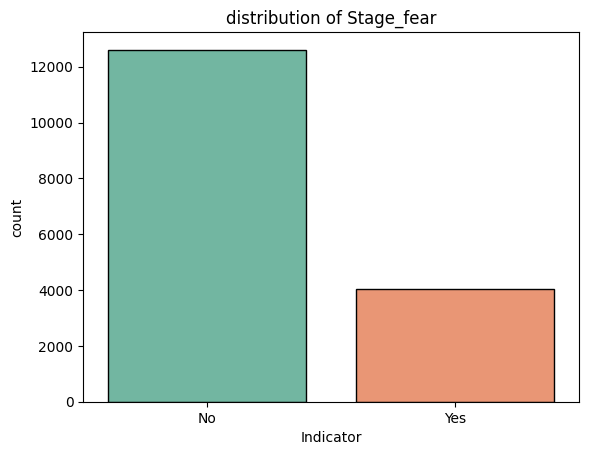

ratio of each category in Stage_fear, 

Stage_fear
No     0.76
Yes    0.24
Name: proportion, dtype: float64 
--------------------------------------------------------------------------------


C:\Users\yevhe\AppData\Local\Temp\ipykernel_20892\4209368574.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df_test, x = cols, palette = 'Set2', edgecolor = 'black')


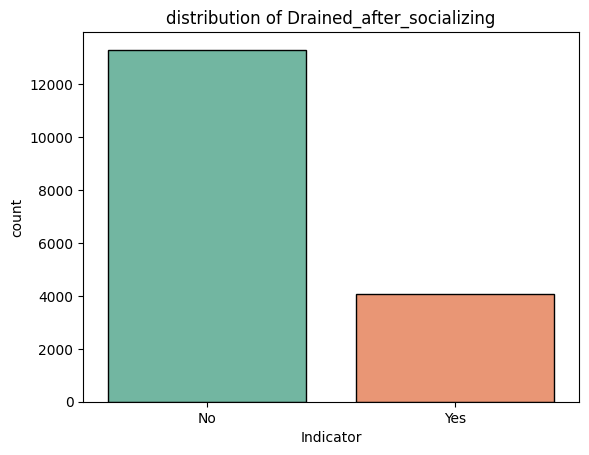

ratio of each category in Drained_after_socializing, 

Drained_after_socializing
No     0.77
Yes    0.23
Name: proportion, dtype: float64 
--------------------------------------------------------------------------------


In [232]:
#exploring the categorical data

for cols in cat_cols.drop('Personality'):
    ax,figure = plt.subplots()
    sns.countplot(df_test, x = cols, palette = 'Set2', edgecolor = 'black')
    plt.xlabel('Indicator')
    plt.title(f'distribution of {cols}')

    plt.show()
    
    print(f'ratio of each category in {cols}, \n')
    print(df_test[cols].value_counts(normalize = True). round(2), '\n' + '--' * 40)





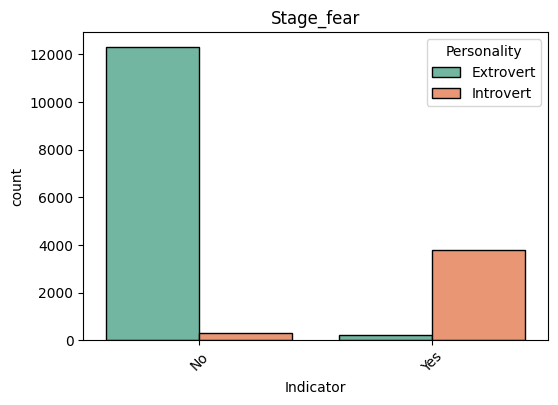

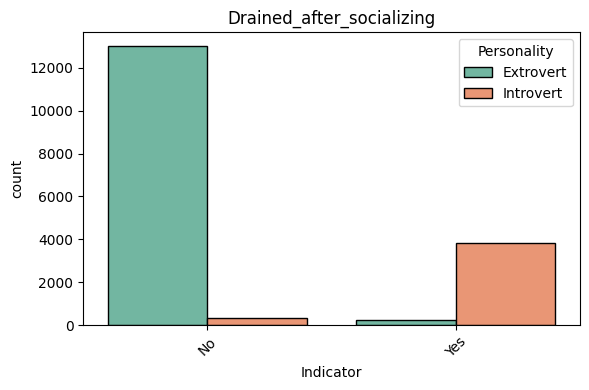

In [ ]:
#exploring the categorical data

#the below graphs show the balance of each attributes vs the target variable


for cols in cat_cols.drop('Personality'):
    figure,ax  = plt.subplots(figsize = (6,4))
    sns.countplot(df_test, x = cols, order = df_test[cols].value_counts().index, hue = 'Personality', palette = 'Set2', edgecolor = 'black')
    plt.xlabel('Indicator')
    plt.title(f'{cols}')
    plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()    



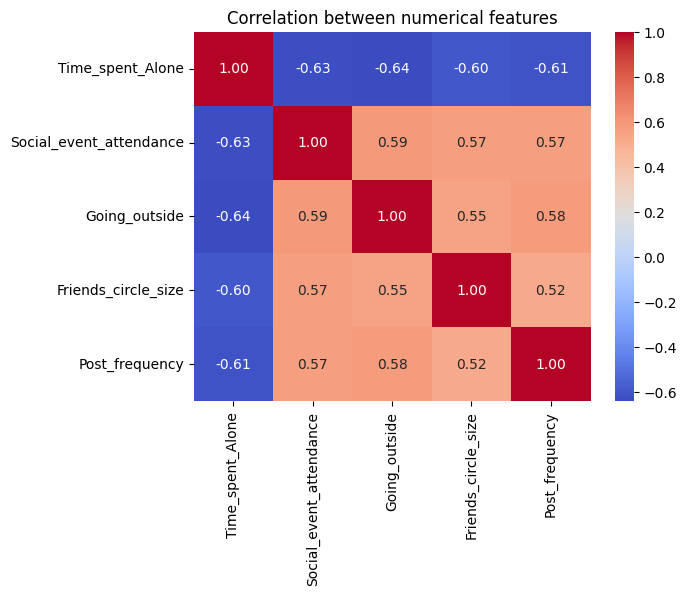

In [ ]:
#exploring the strength of the correllation between the numerical variables

num_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
       'Friends_circle_size', 'Post_frequency']
ax,figure = plt.subplots()
sns.heatmap(df_test[num_cols].corr(), annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Correlation between numerical features')
plt.show()




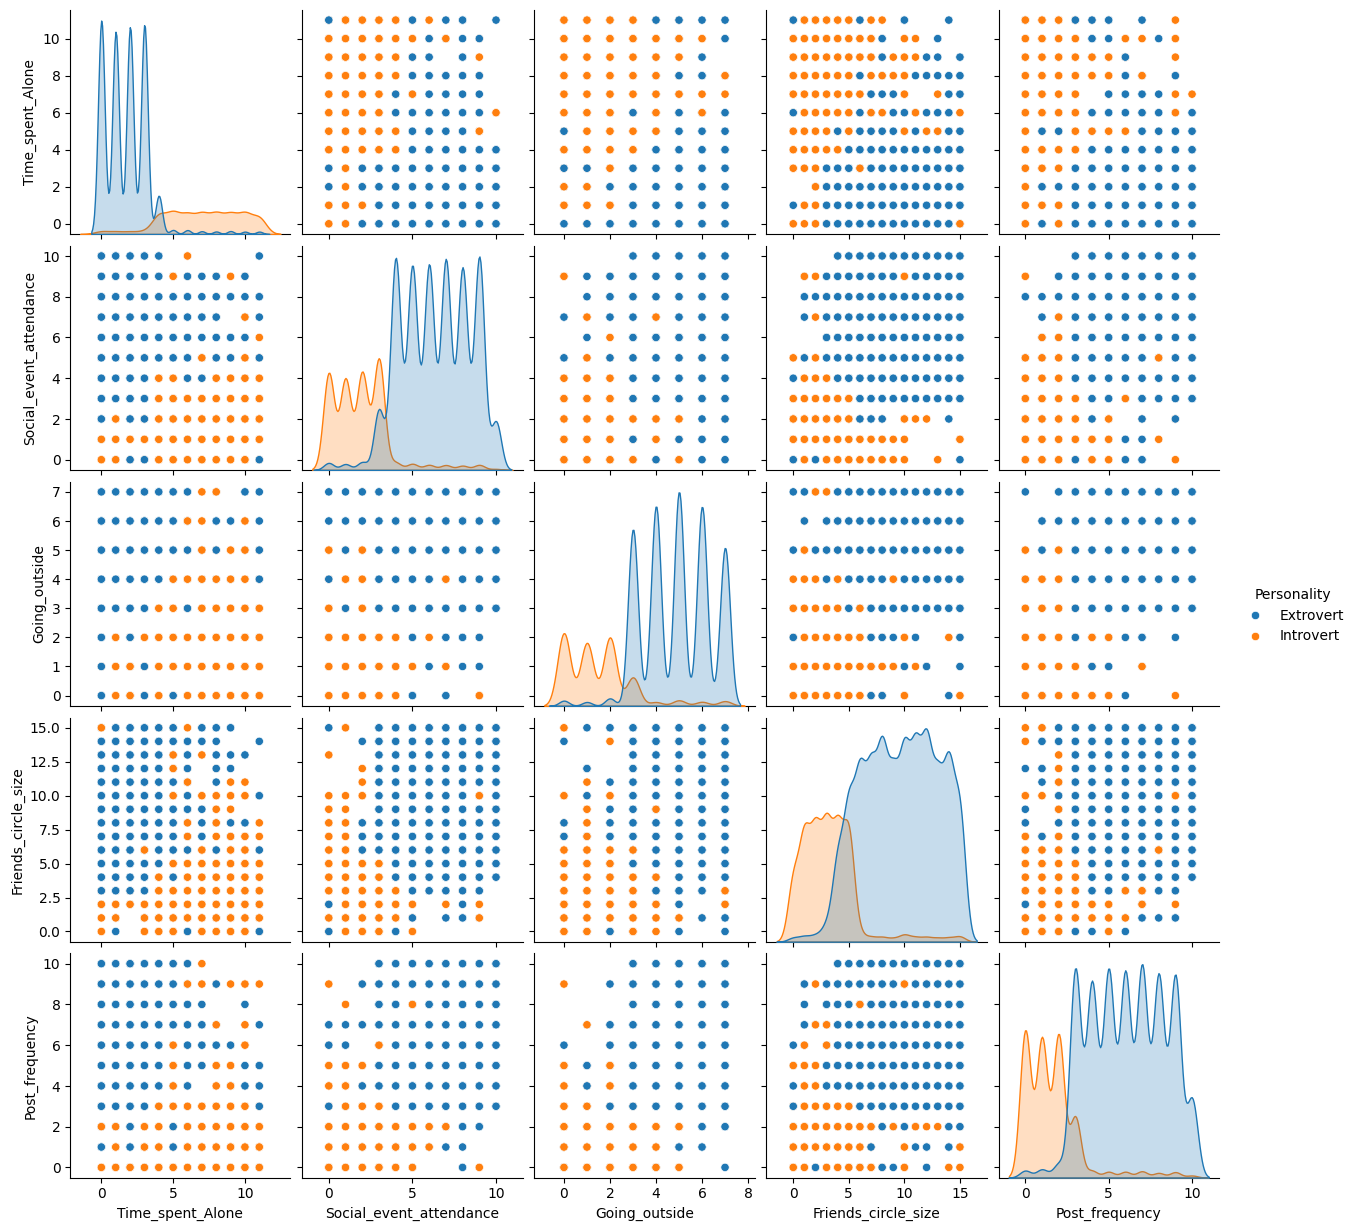

In [ ]:
#exploring the correlation using pairplot
sns.pairplot(df_test,vars=num_cols, hue = 'Personality')

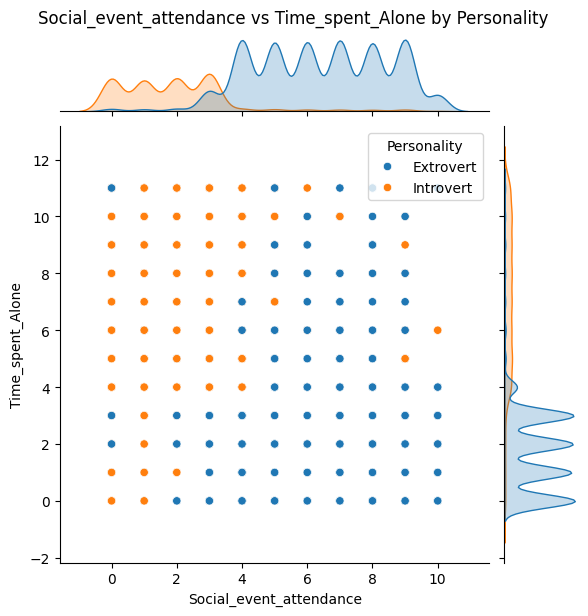

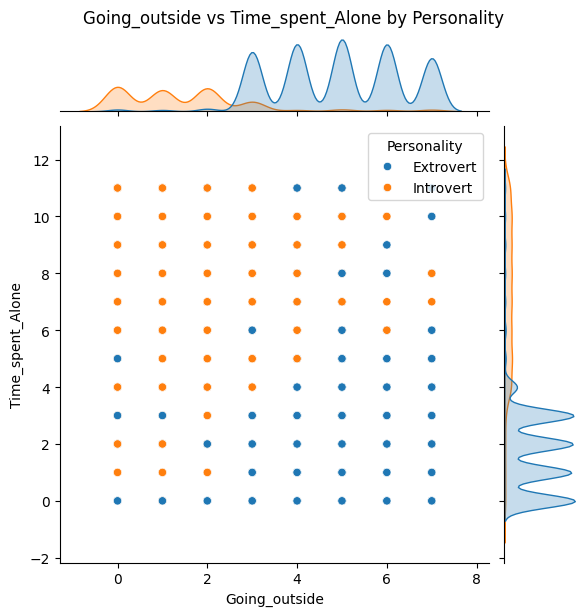

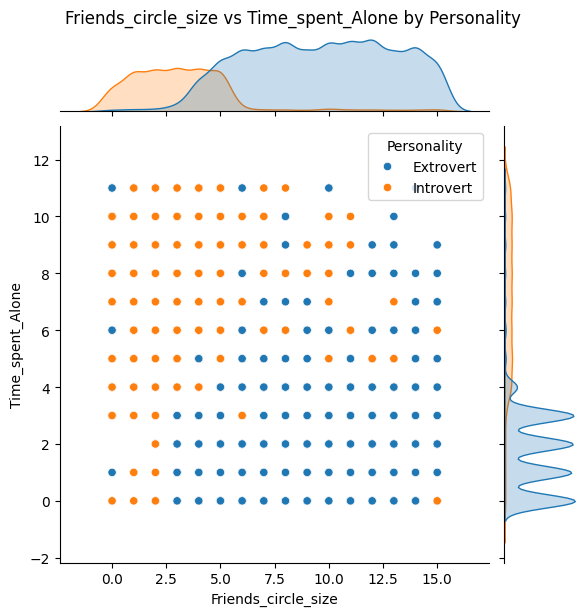

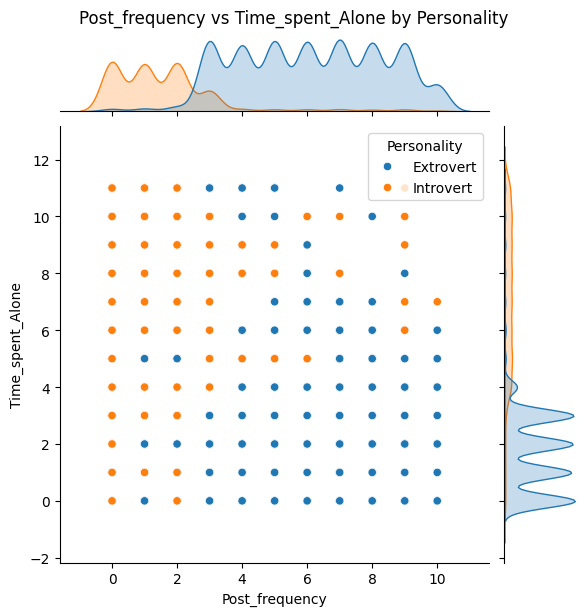

In [301]:
#Exploring the relationship between Time_spent_alone and the rest of the variables:

for i, col in enumerate(num_cols):
   if col != 'Time_spent_Alone': 
    a = sns.jointplot(data = df_test, x = col, y = 'Time_spent_Alone', hue="Personality", kind = 'scatter')
    a.fig.suptitle(f'{col} vs Time_spent_Alone by Personality', y = 1.02)
    plt.show()

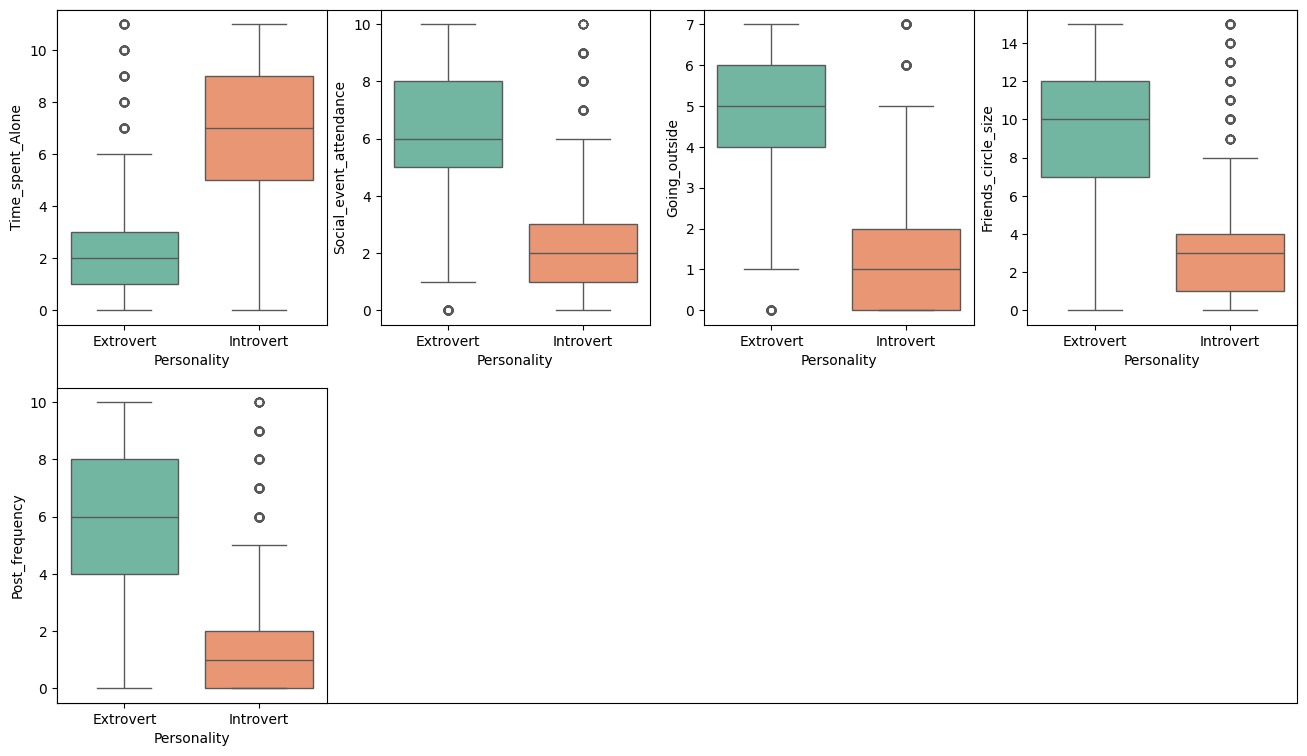

In [342]:
#comparing the categorical parameters with the target variable

figure, ax = plt.subplots(figsize = (16,9))
for i,cols in enumerate(num_cols):
    plt.subplot(2,4,i+1)
    sns.boxplot(df_test, x = 'Personality', y = cols, hue = 'Personality', palette="Set2")
ax.set_xticks([])
ax.set_yticks([])
plt.show()

##Analysis write-up

Overall patterns:

1. Data set contains 18.5k rows. On average each fiels is missing 5% of values with the Stage_Fear having to the most of the missing values in the field(~10%)

2. The data set has been evaluated for 0 values. Each field is within the acceptable range of <5%. Time_Spent_alone has got the highest amount ~17%, which could be explained as some people may not be spending any time alone during the day.

3. Outliers check has been done. Time_spent alone is the only column that contains the outliers which contribute ~9% of all values.

4. Skewness has been evaluated. Time_Spent_alone has got the skewness to the left and going_outside is slightly skewed to the right.

5. Stage_fear and Drained_after_socialising are both skewed to "Yes" ~75% to 25% "No"

6. Looking at the categorical features from the target perspective it is noticed that both extraverts and introverts are negatively correlated.

7. Finally, the correlation between the num_variables has been explored and it could be observed that time_spent_alone is negatively correlated with the rest of the variables. While the rest are positively correlated with each other.


Attribute findings:

1. Time_Spend_alone - surveyed people spend 3.13 alone on average. IQR - 3 hours and 75% 4 hours. It indicates that there is a small minority of the surveyed who spend most of their day alone

2. Social_Event_Attendance - 5hours on average. IQR - 5hours and 75% 8 hours which indicates the the majority dedicated about 5 hours to the social events.

3. Going_outside - Avrg time outside - 4 hours. IQR - 3 hours and 75% - 6 hours. the following series are balanced and distributed closely around the mean.

4. Friends_circle_size - avrg number of close friends - 8 people. IQR - 7 people. Full range 0-15 people, but it could be seen that the majority of observations lie in the IQR

5. Post_Frequency - range - 0 to 10 posts. avrg posts -5 posts, IQR - 4 posts and 75% is within 7 posts.

6. Stage_Fear -  as noted above it has been observed that 75% of respondents dont have a fear of stage.

7. Drain_after_socialising - in like manner as stage_fear 75% of respondents dont experience fatigue after socialising.
